# Intensity of Light on Surface Based on Angle to Light

## World

In this notebook, lies a program that will read in data of the altitude of each point on Earth. From that data, a source of light of designated brightness at an angle to the surface. From this, it is possible to compute how much light falls onto the surface.

Import Modules

In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Use central derivative to find each position's slope

In [23]:
# Define central difference here to approximate derivatives later on
def derivative_central(x, y):
    """Approximate first derivative using the central difference technique

    Parameters
    ----------
    x : numpy array
        The x-value of the function
    y : numpy array
        The y-values cooresponding to the x-values at the function

    Returns
    -------
    dy/dx : numpy array
        The approximation of the derivative in an N-2 dimensional
        numpy array

    """
    dy = y[1:]-y[:-1]
    dx = x[1:]-x[:-1]
    return dy / dx

Read in the altitudinal data, and denote where each point lies

In [24]:
# Read altitude.txt and save in variable called data
data = np.loadtxt("altitude.txt")
nrow, ncol = data.shape
stepsize = 30000

# Find x-positional values and y-positional
# Start at 0 and have steps of 30,000
x_pos = np.arange(0, ncol) * stepsize
y_pos = np.arange(0, nrow) * stepsize

Plot the altitudinal data just read in to verify we have the correct plot.

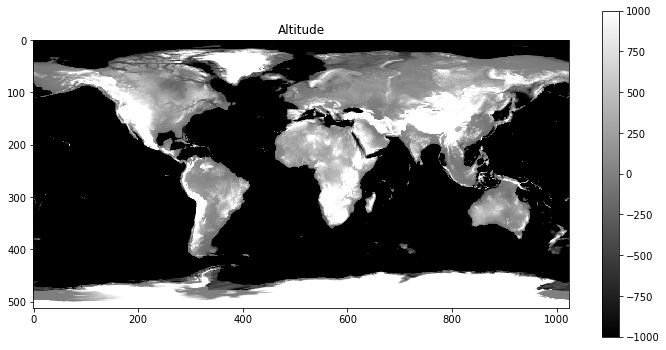

In [25]:
# Plot altitude
plt.figure(figsize=(12, 6))
plt.title("Altitude")
plt.imshow(data, vmin=-1000, vmax=1000, cmap="gray")
plt.colorbar()
plt.show()

Find the slope at each point.

In [26]:
# Find x slope
# Use central difference method to find slope in middle row points
# Since we are using the central difference, ensure first and last
# column and row are excluded
x_slope = np.ones([nrow-1, ncol-1])
for i in range(nrow-1):
    res = derivative_central(x_pos, data[i, :])
    x_slope[i, :] = res
    
# Find y-slope
# Use central difference method to find slope in middle column points
# Since we are using the central difference, ensure first and last
# column and row are excluded
y_slope = np.ones([nrow-1, ncol-1])
for j in range(ncol-1):
    res = derivative_central(y_pos, data[:, j])
    y_slope[:, j] = res

The angle the light is at <code>phi</code>

In [27]:
# Find intensity at each point
phi = 185                                   # angle of light in degrees
phi = phi * 2 * np.pi / 360                 # change angle to radians, because that's what np wants

Find the amount of light each point receives.

In [28]:
# calculate illumination
I = np.cos(phi) * x_slope + np.sin(phi) * y_slope     # based on perpedicularity to light source
I = I / np.sqrt(x_slope**2 + y_slope**2 + 1)          # normalize I such that it varies from 0 to 1

Plot the amount of light for the Earth.

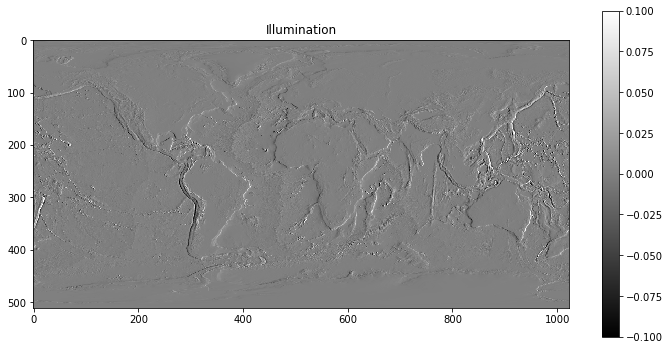

In [29]:
# Plot result
plt.figure(figsize=(12, 6))
plt.title("Illumination")
plt.imshow(I, vmin=-0.1, vmax=0.1, cmap='gray')
plt.colorbar()
plt.show()

## STM

Read the Scanning Tunneling Machine data, and calculate the position of each point

In [30]:
# Read in the scanning tunneling machine data
data = np.loadtxt("stm.txt")
nrow, ncol = data.shape                  
stepsize = 2.5                           # each point is 2.5 mm apart

# Find x-positional values and y-positional
# Start at 0, stepping by 2.5, stop when reach number of data points
x_pos = np.arange(0, ncol) * stepsize
y_pos = np.arange(0, nrow) * stepsize

Plot the STM data just read in to verify we have the correct data.

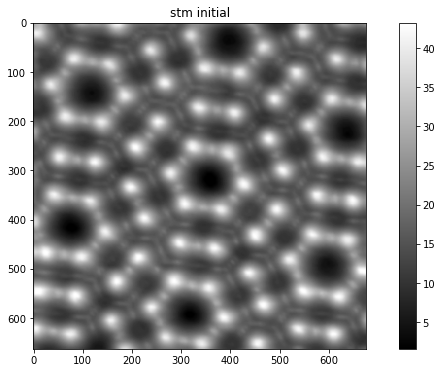

In [31]:
# Plot intitial
plt.figure(figsize=(12, 6))
plt.title("stm initial")
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()

Find the slope at each point.

In [32]:
# Find x slope
# Use central difference method to find slope in middle row points
# Since we are using the central difference, ensure first and last
# column and row are excluded
x_slope = np.ones([nrow-1, ncol-1])
for i in range(nrow-1):
    res = derivative_central(x_pos, data[i, :])
    x_slope[i, :] = res
    
# Find y-slope
# Use central difference method to find slope in middle column points
# Since we are using the central difference, ensure first and last
# column and row are excluded
y_slope = np.ones([nrow-1, ncol-1])
for j in range(ncol-1):
    res = derivative_central(y_pos, data[:, j])
    y_slope[:, j] = res

Find the amount of light each point receives.

In [33]:
# calculate illumination
I = np.cos(phi) * x_slope + np.sin(phi) * y_slope     # based on perpedicularity to light source
I = I / np.sqrt(x_slope**2 + y_slope**2 + 1)          # normalize I such that it varies from 0 to 1

Plot the STM illumination result.

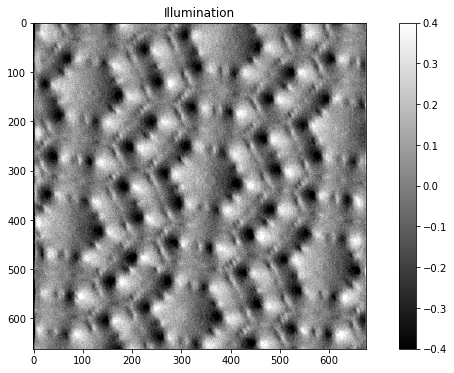

In [34]:
# Plot result
plt.figure(figsize=(12, 6))
plt.title("Illumination")
plt.imshow(I, vmin=-0.4, vmax=0.4, cmap='gray')
plt.colorbar()
plt.show()